In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.font_manager
warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib.font_manager')

In [2]:
df=pd.read_csv("../../Data/Raw/data_1_leaps/BankChurners.csv")

In [3]:
df.sample()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9881,709937583,Existing Customer,45,F,2,High School,Single,Unknown,Blue,34,...,3,2,3024.0,1835,1189.0,0.793,14220,108,0.662,0.607


In [4]:
df=df.drop(columns=['CLIENTNUM'])
df=df.drop(columns=['Education_Level'])

In [5]:
df['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [6]:
# Dropping unknown values......could fill with statistical values,but business point of view isnt available
df = df.drop(df[df['Income_Category'] == 'Unknown'].index)

In [7]:
df['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: count, dtype: int64

In [8]:
import matplotlib.pyplot as plt

def plot_bar_pie(df, column_name, colors):
    # Count the values
    counts = df[column_name].value_counts()

    # Bar chart
    plt.figure(figsize=(8, 4))
    counts.plot(kind='bar', color=colors)
    plt.title(f'{column_name} - Bar Chart')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Pie chart
    plt.figure(figsize=(6, 6))
    counts.plot(kind='pie', colors=colors, autopct='%1.1f%%')
    plt.title(f'{column_name} - Pie Chart')
    plt.ylabel('')  # Hide y-label
    plt.tight_layout()
    plt.show()


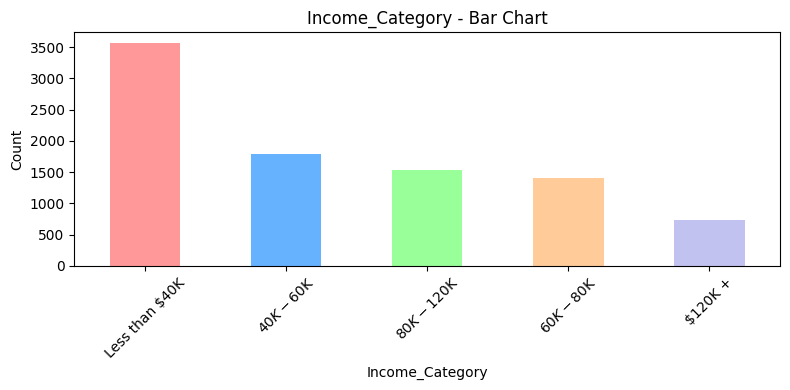

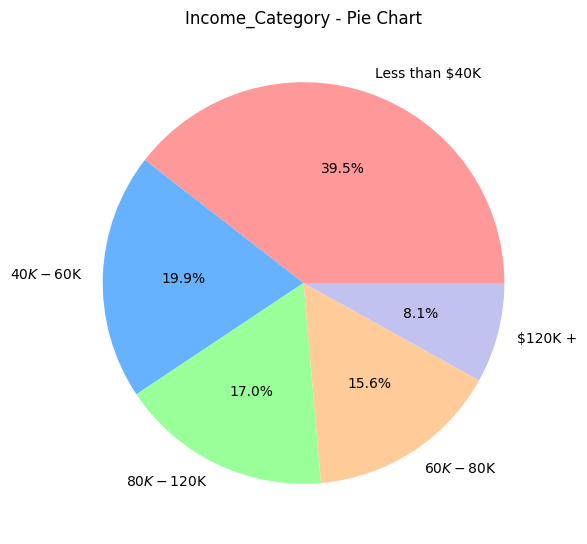

In [9]:
color_palette_cat = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#C2C2F0']
plot_bar_pie(df, 'Income_Category', color_palette_cat)

In [10]:
#marital status- to convert into yes or no
#mybe group divorced with singles
df['Marital_Status'].value_counts()

Marital_Status
Married     4194
Single      3499
Unknown      667
Divorced     655
Name: count, dtype: int64

In [11]:
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced'], 'Single')

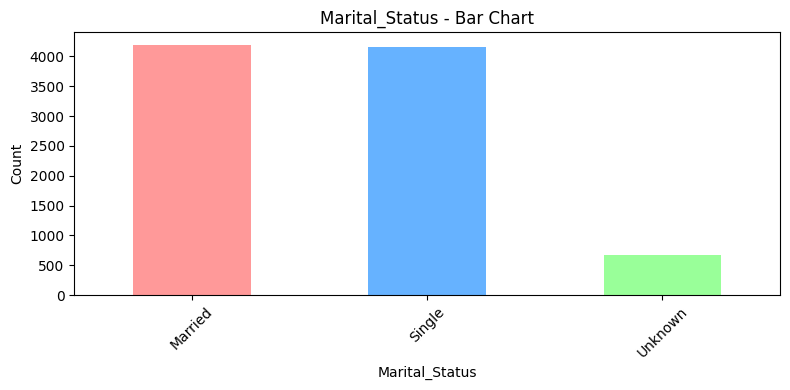

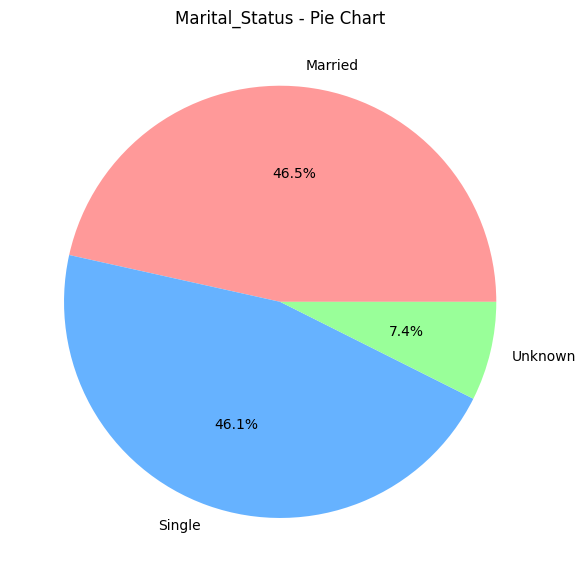

In [12]:
plot_bar_pie(df, 'Marital_Status', color_palette_cat)

In [13]:
df['Card_Category'].value_counts()

Card_Category
Blue        8391
Silver       502
Gold         107
Platinum      15
Name: count, dtype: int64

In [14]:
#grouping silver,gold,platinum together to get a differentiation
df['Card_Category'] = df['Card_Category'].replace(['Silver', 'Gold', 'Platinum'], 'Silver+')

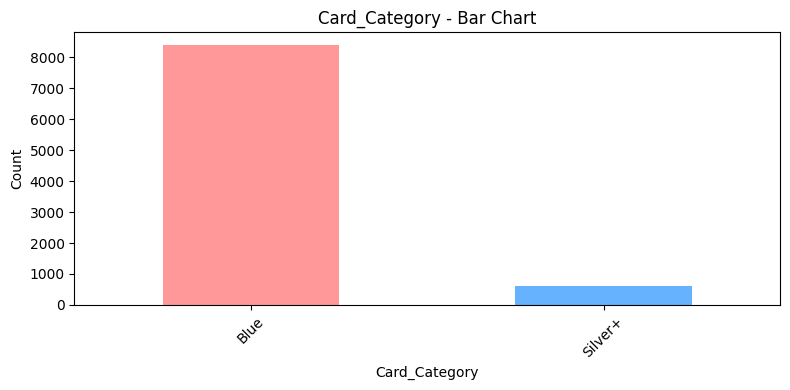

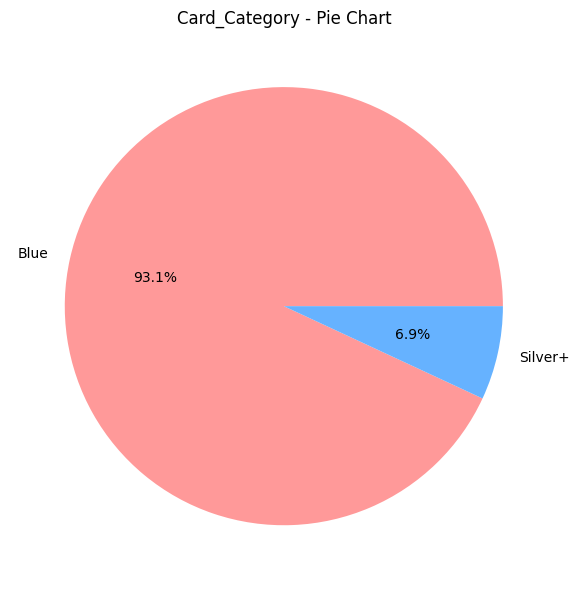

In [15]:
plot_bar_pie(df, 'Card_Category', color_palette_cat)

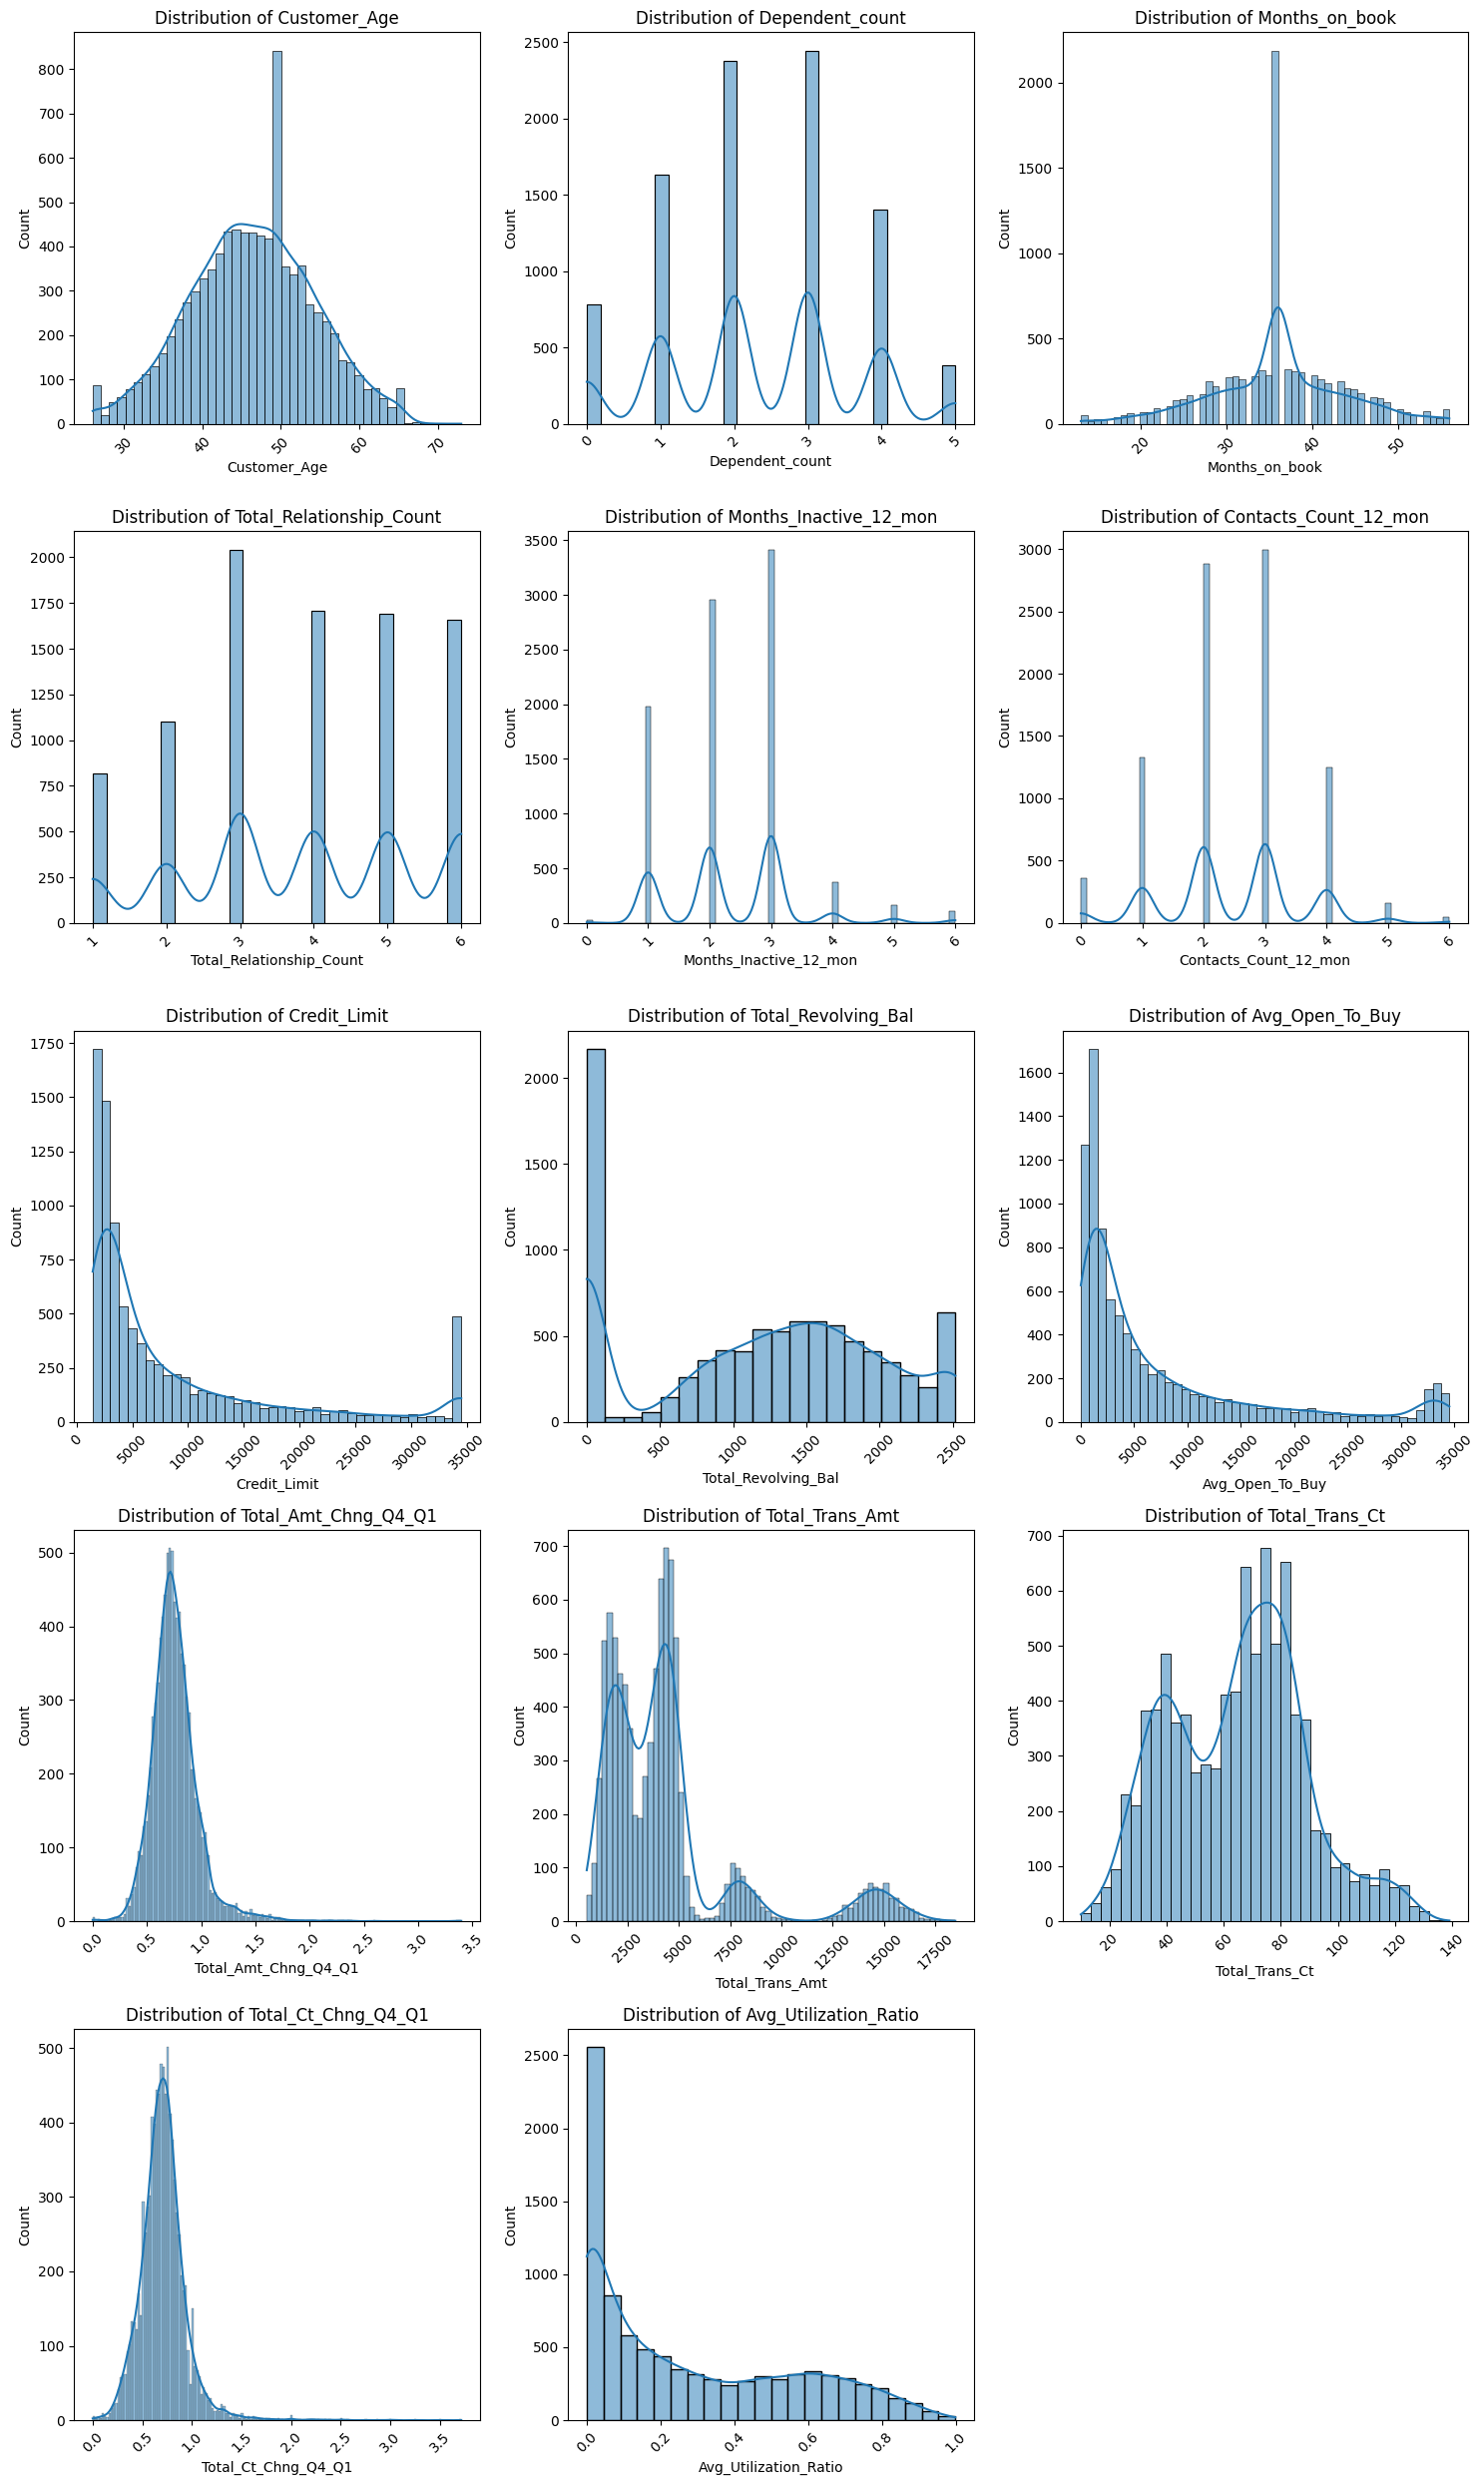

In [16]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

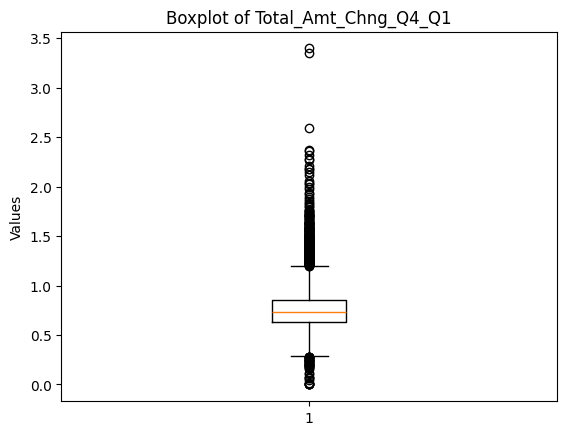

In [17]:
plt.boxplot(df['Total_Amt_Chng_Q4_Q1'])
plt.title('Boxplot of Total_Amt_Chng_Q4_Q1')
plt.ylabel('Values')
plt.show()

In [20]:
def outliers_inspection(df, column_name, return_top=False, num_rows=5):
    # Return top outliers if needed
    if return_top:
        # Calculate Q1 and Q3
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        # Define outliers
        outliers = df[df[column_name] > (Q3 + 1.5 * IQR)]
        return outliers.sort_values(by=column_name, ascending=False).head(num_rows)

outliers_inspection(df, 'Total_Amt_Chng_Q4_Q1', return_top=True, num_rows=10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
219,Existing Customer,44,F,3,Single,Less than $40K,Silver+,38,4,1,3,11127.0,1835,9292.0,2.368,1546,25,1.273,0.165
47,Existing Customer,59,M,1,Married,$40K - $60K,Blue,52,3,2,2,2548.0,2020,528.0,2.357,1719,27,1.700,0.793
46,Existing Customer,56,M,2,Married,$60K - $80K,Blue,45,6,2,0,2283.0,1430,853.0,2.316,1741,27,0.588,0.626
658,Existing Customer,46,M,4,Married,$60K - $80K,Blue,35,5,1,2,1535.0,700,835.0,2.282,1848,25,1.083,0.456
466,Existing Customer,63,M,2,Married,$60K - $80K,Blue,49,5,2,3,14035.0,2061,11974.0,2.271,1606,30,1.500,0.147
7,Existing Customer,32,M,0,Unknown,$60K - $80K,Silver+,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
841,Existing Customer,37,F,3,Married,Less than $40K,Blue,25,6,2,1,1438.3,674,764.3,2.180,1717,31,0.722,0.469
4,Existing Customer,40,M,3,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
284,Existing Customer,61,M,0,Married,$40K - $60K,Blue,52,3,1,2,2939.0,1999,940.0,2.145,2434,33,1.538,0.680
154,Existing Customer,53,F,1,Married,Less than $40K,Blue,47,4,2,3,2154.0,930,1224.0,2.121,1439,26,1.364,0.432


In [21]:
before_count = df.shape[0]
df = df.loc[df['Total_Amt_Chng_Q4_Q1'] < 2.500]
after_count = df.shape[0]
dropped_count = before_count - after_count

print(f"Number of records dropped: {dropped_count}")

Number of records dropped: 0


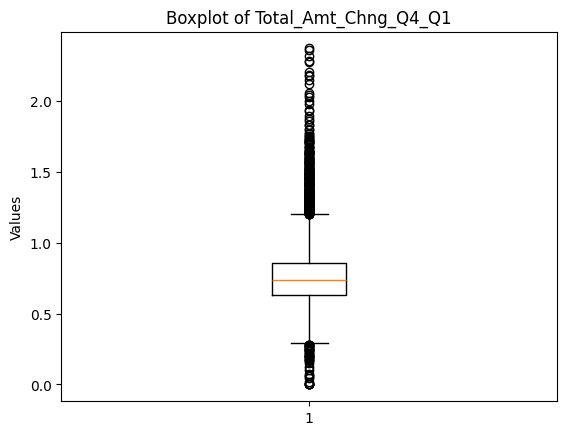

In [22]:
plt.boxplot(df['Total_Amt_Chng_Q4_Q1'])
plt.title('Boxplot of Total_Amt_Chng_Q4_Q1')
plt.ylabel('Values')
plt.show()

In [23]:
outliers_inspection(df, 'Total_Ct_Chng_Q4_Q1', return_top=True, num_rows=15)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1,Existing Customer,49,F,5,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
269,Existing Customer,54,M,5,Married,$60K - $80K,Blue,38,3,3,3,2290.0,1434,856.0,0.923,1119,18,3.500,0.626
113,Existing Customer,54,F,0,Married,Less than $40K,Blue,36,2,2,2,1494.0,706,788.0,1.674,1305,24,3.000,0.473
190,Existing Customer,57,M,1,Married,$80K - $120K,Blue,47,5,3,1,14612.0,1976,12636.0,1.768,1827,24,3.000,0.135
146,Existing Customer,41,F,2,Single,Less than $40K,Blue,32,6,3,2,2250.0,2117,133.0,1.162,1617,31,2.875,0.941
366,Existing Customer,36,F,4,Married,$40K - $60K,Blue,36,6,3,3,1628.0,969,659.0,0.999,1893,15,2.750,0.595
30,Existing Customer,53,M,3,Married,$80K - $120K,Blue,33,3,2,3,2753.0,1811,942.0,0.977,1038,25,2.571,0.658
4,Existing Customer,40,M,3,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
2510,Attrited Customer,54,M,3,Married,$40K - $60K,Blue,44,2,1,5,3032.0,0,3032.0,0.949,1037,14,2.500,0.000
805,Existing Customer,29,M,0,Single,$40K - $60K,Blue,19,4,1,2,13632.0,1482,12150.0,0.893,2168,42,2.500,0.109


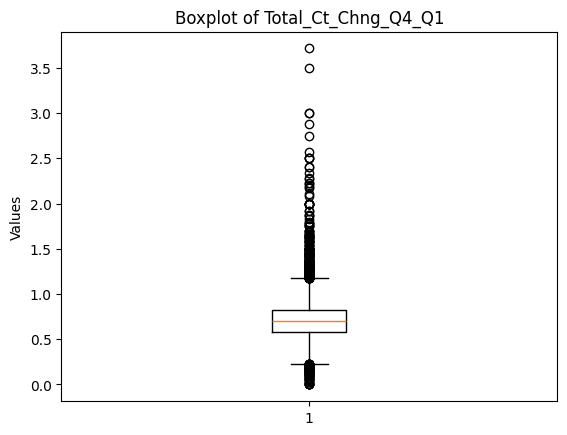

In [24]:
plt.boxplot(df['Total_Ct_Chng_Q4_Q1'])
plt.title('Boxplot of Total_Ct_Chng_Q4_Q1')
plt.ylabel('Values')
plt.show()

In [25]:
before_count = df.shape[0]
df = df[df['Total_Ct_Chng_Q4_Q1'] <= 2.500]
after_count = df.shape[0]
dropped_count = before_count - after_count

print(f"Number of records dropped: {dropped_count}")

Number of records dropped: 7


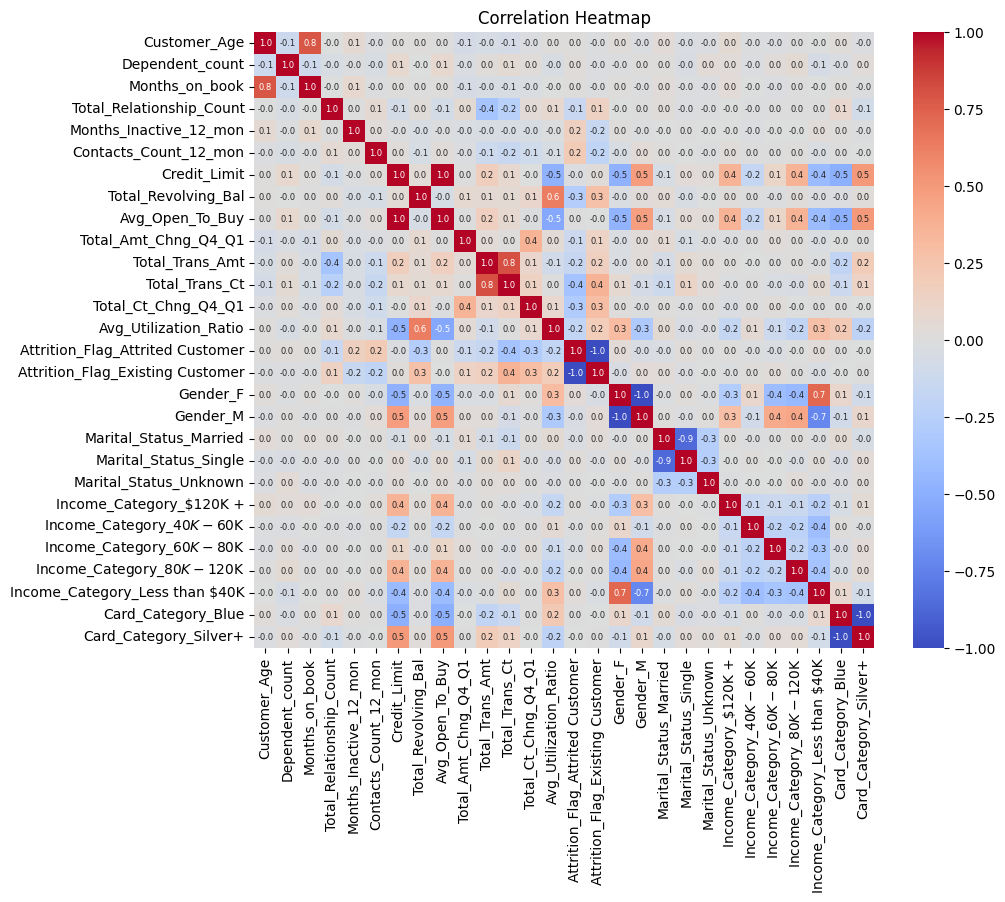

In [26]:
df_dummies = pd.get_dummies(df)

# Plot Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_dummies.corr(), annot=True, cmap="coolwarm", fmt=".1f", annot_kws={"size": 6})
plt.title("Correlation Heatmap")
plt.show()

In [27]:
#avg open to buy is similar to credit limit, one can be dropped
df = df.drop(columns=['Avg_Open_To_Buy'])

In [29]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer

# Define which columns will use which scaler or encoder
one_hot_cols = [
    "Gender",  
    "Marital_Status",
    "Income_Category",
    "Card_Category",
    "Dependent_count",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Attrition_Flag"
]

standard_cols = [
    "Customer_Age", 
    "Total_Amt_Chng_Q4_Q1",
    "Total_Ct_Chng_Q4_Q1",
    "Months_on_book"
]

power_cols = [
    "Total_Revolving_Bal",
    "Credit_Limit",
    "Avg_Utilization_Ratio"
]

minmax_cols = [
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Revolving_Bal"
]

# Create the preprocessing transformer
preprocessing = ColumnTransformer(transformers=[
    ("onehot", OneHotEncoder(), one_hot_cols),
    ("standard", StandardScaler(), standard_cols),
    ("minmax", MinMaxScaler(), minmax_cols),
    ("power", PowerTransformer(), power_cols)
])

# Apply transformations to the DataFrame
processed_data = preprocessing.fit_transform(df)

In [30]:
processed_data

array([[ 0.        ,  1.        ,  1.        , ..., -0.01867558,
         0.98653553, -0.78735708],
       [ 1.        ,  0.        ,  0.        , ...,  1.11748085,
        -0.41962806,  1.46671746],
       [ 0.        ,  1.        ,  1.        , ..., -1.67879575,
         0.00931242, -1.20641628],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -1.67879575,
         0.16345117, -1.20641628],
       [ 0.        ,  1.        ,  0.        , ..., -1.67879575,
         0.13700303, -1.20641628],
       [ 1.        ,  0.        ,  1.        , ...,  0.8268371 ,
         0.81260549, -0.0938403 ]], shape=(9005, 50))

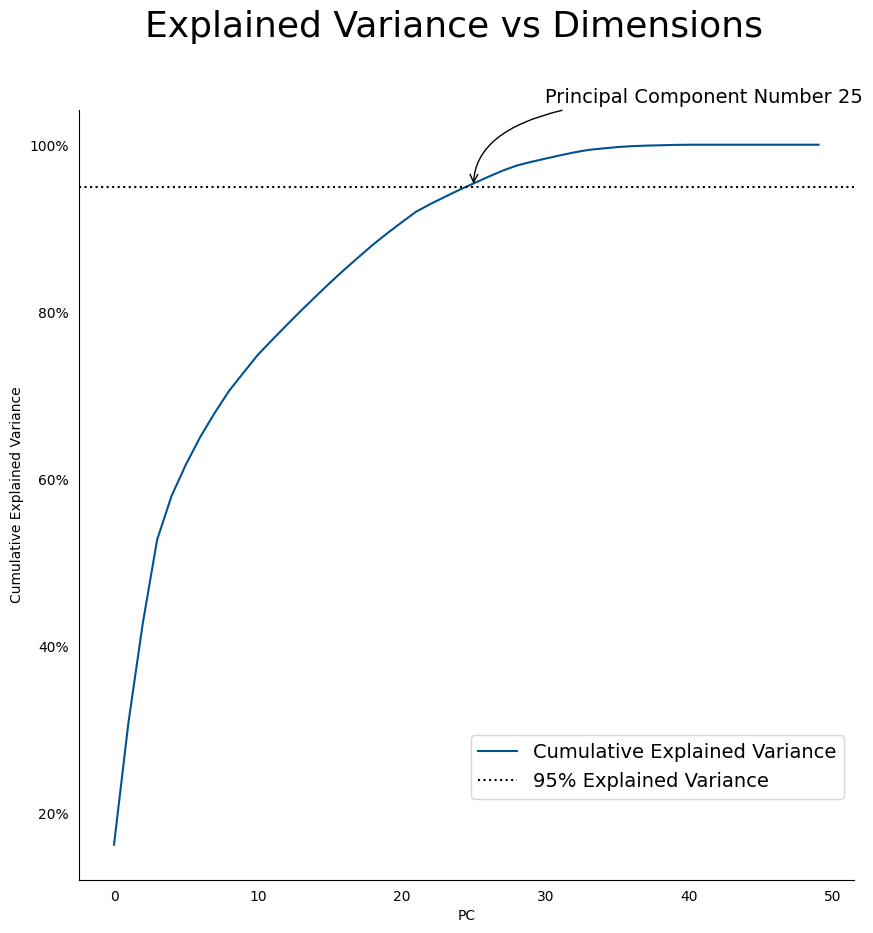

In [31]:
import matplotlib as mpl
import matplotlib.ticker as mtick
from sklearn.decomposition import PCA
# Run PCA without limiting n_components
pca = PCA()
pca.fit(processed_data)

# Explained variance
cumsum = np.cumsum(pca.explained_variance_ratio_) * 100
d = list(range(len(cumsum)))

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = 14

ax.plot(d, cumsum, color='#00538F', label='Cumulative Explained Variance')
ax.axhline(y=95, color='black', linestyle=':', label='95% Explained Variance')
ax.legend(loc='best')

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

for i in ['top', 'right']:
    ax.spines[i].set_visible(False)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

arrowprops = dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90")
threshold_idx = next(i for i, val in enumerate(cumsum) if val >= 95)

plt.annotate(f'Principal Component Number {threshold_idx}',
             xy=(threshold_idx, 95),
             xytext=(threshold_idx + 5, 105),
             arrowprops=arrowprops,
             size=14)

plt.legend(bbox_to_anchor=(1, 0.2))
plt.suptitle('Explained Variance vs Dimensions', size=26)
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('PC')
plt.show()

In [35]:
processed_data.shape

(9005, 50)

In [36]:
# Apply preprocessing and convert the result back into a DataFrame
df_scaled = pd.DataFrame(
    preprocessing.fit_transform(df),
    columns=preprocessing.get_feature_names_out()
)

# Show the first few rows
df_scaled.head()

,onehot__Gender_F,onehot__Gender_M,onehot__Marital_Status_Married,onehot__Marital_Status_Single,onehot__Marital_Status_Unknown,onehot__Income_Category_$120K +,onehot__Income_Category_$40K - $60K,onehot__Income_Category_$60K - $80K,onehot__Income_Category_$80K - $120K,onehot__Income_Category_Less than $40K,...,standard__Customer_Age,standard__Total_Amt_Chng_Q4_Q1,standard__Total_Ct_Chng_Q4_Q1,standard__Months_on_book,minmax__Total_Trans_Amt,minmax__Total_Trans_Ct,minmax__Total_Revolving_Bal,power__Total_Revolving_Bal,power__Credit_Limit,power__Avg_Utilization_Ratio
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.167592,2.685616,4.057514,0.385009,0.035273,0.248062,0.308701,-0.018676,0.986536,-0.787357
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.797828,3.011500,7.194350,-0.245814,0.036775,0.077519,1.000000,1.117481,-0.419628,1.466717
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.797828,6.596230,7.934254,-1.885955,0.017025,0.139535,0.000000,-1.678796,0.009312,-1.206416
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.293639,2.876491,0.606107,0.006515,0.032158,0.108527,0.495431,0.372032,-0.181788,0.400059
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.588691,5.665131,0.056718,1.268161,0.045621,0.162791,0.899484,0.990374,1.708979,-0.755909


In [37]:
def plot_elbow_silhouette(data, max_k=10):
    wcss = []
    silhouette_scores = []

    # Try different values for number of clusters
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)

        # Save WCSS (inertia) and silhouette score
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, labels))

    # Plot Elbow Method
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_k + 1), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')

    # Plot Silhouette Method
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', color='orange')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')

    plt.tight_layout()
    plt.show()

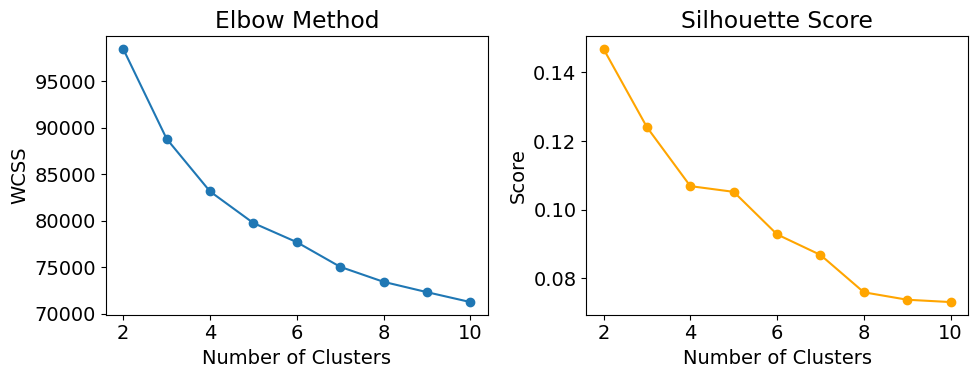

In [38]:
plot_elbow_silhouette(df_scaled)

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Set random seed for reproducibility
RANDOM_STATE = 42

# Create pipeline for preprocessing, PCA, and KMeans clustering
pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("pca", PCA(n_components=25, random_state=RANDOM_STATE)),
    ("clustering", KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10))
])

# Fit the pipeline to the original data
pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  ['Gender', 'Marital_Status',
                                                   'Income_Category',
                                                   'Card_Category',
                                                   'Dependent_count',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Attrition_Flag']),
                                                 ('standard', StandardScaler(),
                                                  ['Customer_Age',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Months_on_book']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Revolving_Bal']),
                                                 ('power', PowerTransformer(),
                                                  ['Total_Revolving_Bal',
                                                   'Credit_Limit',
                                                   'Avg_Utilization_Ratio'])])),
                ('pca', PCA(n_components=25, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [41]:
df_clustered = df.copy()
df_clustered["Cluster"] = pipeline["clustering"].labels_

df_clustered.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Cluster
0,Existing Customer,45,M,3,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061,1
3,Existing Customer,40,F,4,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,0
4,Existing Customer,40,M,3,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000,2
5,Existing Customer,44,M,2,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,1.376,1088,24,0.846,0.311,0
6,Existing Customer,51,M,4,Married,$120K +,Silver+,46,6,1,3,34516.0,2264,1.975,1330,31,0.722,0.066,1


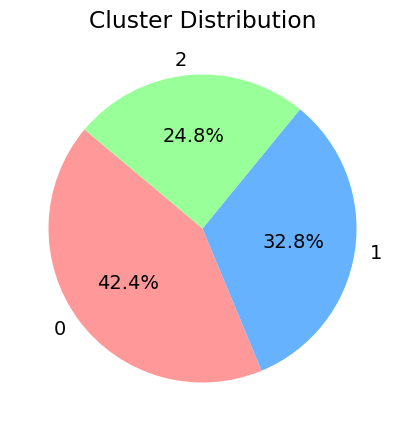

In [42]:
cluster_counts = df_clustered["Cluster"].value_counts().sort_index()

# Pie Plot
plt.figure(figsize=(5, 5))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=color_palette_cat)

plt.title('Cluster Distribution')
plt.show()

In [43]:
df_pca = pd.DataFrame(
    pipeline[:-1].fit_transform(df),
    columns=pipeline[:-1].get_feature_names_out()
)

df_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24
0,0.083389,-0.799903,3.696095,3.300218,-0.785449,0.767369,-0.010600,0.187981,0.757195,-0.121312,...,-0.618549,-0.442898,-0.610155,-0.527470,0.259432,-0.504997,-0.492093,-0.350973,-0.120818,-0.014005
1,3.846776,-1.684088,3.776188,4.951149,-2.778580,-0.036769,0.367892,0.516577,0.245390,-0.580053,...,-0.252328,-1.128564,0.006947,0.395693,-0.473099,0.446305,-0.188783,-0.520116,-0.306974,0.938246
2,0.631684,-3.801704,5.374508,8.369004,-0.777503,0.920750,-0.525908,0.172008,0.134226,-0.409244,...,0.161647,-1.043286,-0.465676,-0.449518,0.340671,-0.435738,-0.441969,-0.245493,-0.026465,-0.002563
3,0.989303,-0.644758,1.655615,1.564367,1.719872,0.668580,-0.451754,-0.395314,-0.700878,0.890433,...,-0.251812,0.192760,0.099439,-0.085685,0.223826,0.052382,0.000749,-0.101491,-0.006751,-0.066123
4,0.017091,0.325151,4.336256,2.098802,4.025341,-0.378922,0.895688,-0.086183,0.587348,0.730164,...,-0.694420,0.000908,-0.143131,0.665771,-0.423562,0.454319,-0.859046,0.004322,0.241099,-0.172236


In [45]:
# Step 1: Get PCA-reduced features
features_2d = pipeline.named_steps['pca'].transform(
    pipeline.named_steps['preprocessing'].transform(df)
)

# Step 2: Get cluster labels
labels = pipeline.named_steps['clustering'].labels_

# Step 3: Create df_pca with cluster labels
df_pca = pd.DataFrame(features_2d, columns=['PCA0', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9',
 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17', 'PCA18', 'PCA19',
 'PCA20', 'PCA21', 'PCA22', 'PCA23', 'PCA24']
)
df_pca['cluster'] = labels

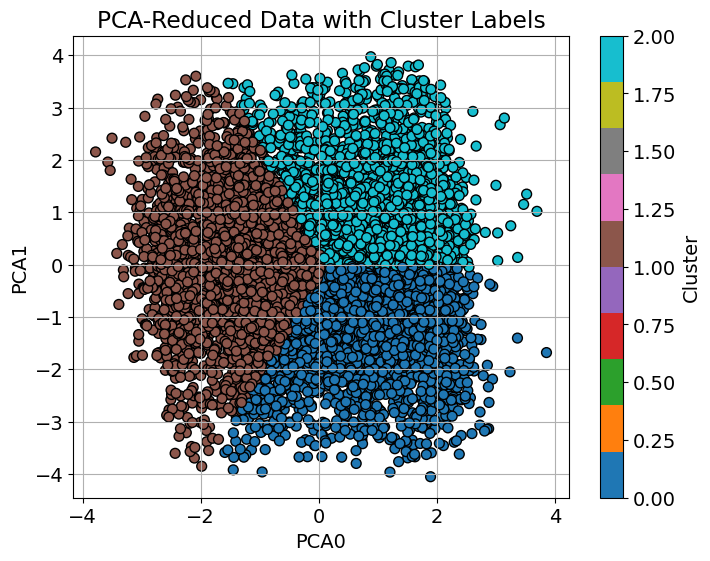

In [219]:
# # Assume df_pca has columns 'PCA0', 'PCA1', and 'cluster'
# plt.figure(figsize=(8, 6))
# scatter = plt.scatter(
#     df_pca['PCA0'], df_pca['PCA1'],
#     c=df_pca['cluster'], cmap='tab10', s=50, edgecolor='k'
# )

# plt.title("PCA-Reduced Data with Cluster Labels")
# plt.xlabel("PCA0")
# plt.ylabel("PCA1")
# plt.grid(True)
# plt.colorbar(scatter, label='Cluster')
# plt.show()

In [46]:
centroids = pipeline["clustering"].cluster_centers_
centroids

array([[ 1.38259986e+00,  1.04556029e-01, -3.23526194e-01,
        -1.65740405e-02,  9.27212298e-03, -4.96612796e-03,
        -2.95606214e-02,  4.38813754e-04,  4.02962341e-03,
        -2.32862508e-03,  2.70228683e-04,  4.52858969e-03,
         1.47837173e-03,  4.30596488e-03, -9.65157714e-03,
        -2.27455525e-03, -9.23750637e-03,  4.32981895e-03,
         2.75677066e-03, -1.21968369e-03,  7.18183490e-03,
         6.83740578e-03,  1.17674212e-02,  4.63945992e-03,
         2.80612739e-04],
       [-4.72525365e-01, -5.82721224e-02,  1.07210803e+00,
        -6.22170046e-01,  3.91686158e-03, -3.05673067e-02,
         8.55217853e-02,  5.54055808e-03, -5.41958712e-03,
         7.04407622e-03, -2.10188094e-03, -6.44675488e-03,
        -7.28583969e-03, -5.31336754e-03,  1.83727401e-02,
         9.01195651e-03,  2.17295674e-02, -8.21557552e-03,
        -8.35435646e-03,  1.74256687e-03, -8.74364335e-03,
        -9.53982361e-03, -2.18682453e-02, -4.02939258e-03,
         6.55496354e-04],
    

In [221]:
# def plot_clusters_2D(dataframe, columns, n_colors=3, centroids=None, show_points=True, column_clusters=None):
#     plt.figure(figsize=(8, 6))

#     # Use 'cluster' column or externally provided labels
#     if column_clusters is not None:
#         cluster_colors = column_clusters
#     elif 'cluster' in dataframe.columns:
#         cluster_colors = dataframe['cluster']
#     else:
#         raise ValueError("No cluster labels found. Add 'cluster' column or pass 'column_clusters'.")

#     # Scatter plot
#     if show_points:
#         scatter = plt.scatter(
#             dataframe[columns[0]],
#             dataframe[columns[1]],
#             c=cluster_colors,
#             cmap=plt.cm.get_cmap('tab10', n_colors),
#             alpha=0.7
#         )
#         plt.colorbar(scatter, ticks=range(n_colors))

#     # Plot centroids if given
#     if centroids is not None:
#         plt.scatter(
#             centroids[:, 0],
#             centroids[:, 1],
#             c='black',
#             marker='X',
#             s=100,
#             label='Centroids'
#         )

#     plt.xlabel(columns[0])
#     plt.ylabel(columns[1])
#     plt.title("2D Cluster Plot")
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

In [222]:
# plot_clusters_2D(
#     dataframe=df_pca,
#     columns=df_pca.columns,
#     n_colors=3,
#     centroids=centroids,
# )

In [47]:
columns_analysis = [
    "Customer_Age",
    "Months_on_book",
    "Total_Trans_Amt",
    "Credit_Limit",
    "Avg_Utilization_Ratio",
    "Total_Revolving_Bal"
]

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

def pairplot(dataframe, columns, hue_column=None, palette="Set2"):
    sns.pairplot(
        dataframe[columns + [hue_column]] if hue_column else dataframe[columns],
        hue=hue_column,
        palette=palette,
        diag_kind="kde",  # You can use "hist" too
        corner=True        # Hides upper triangle for cleaner plots
    )
    plt.suptitle("Pair Plot of Selected Features", y=1.02)
    plt.show()

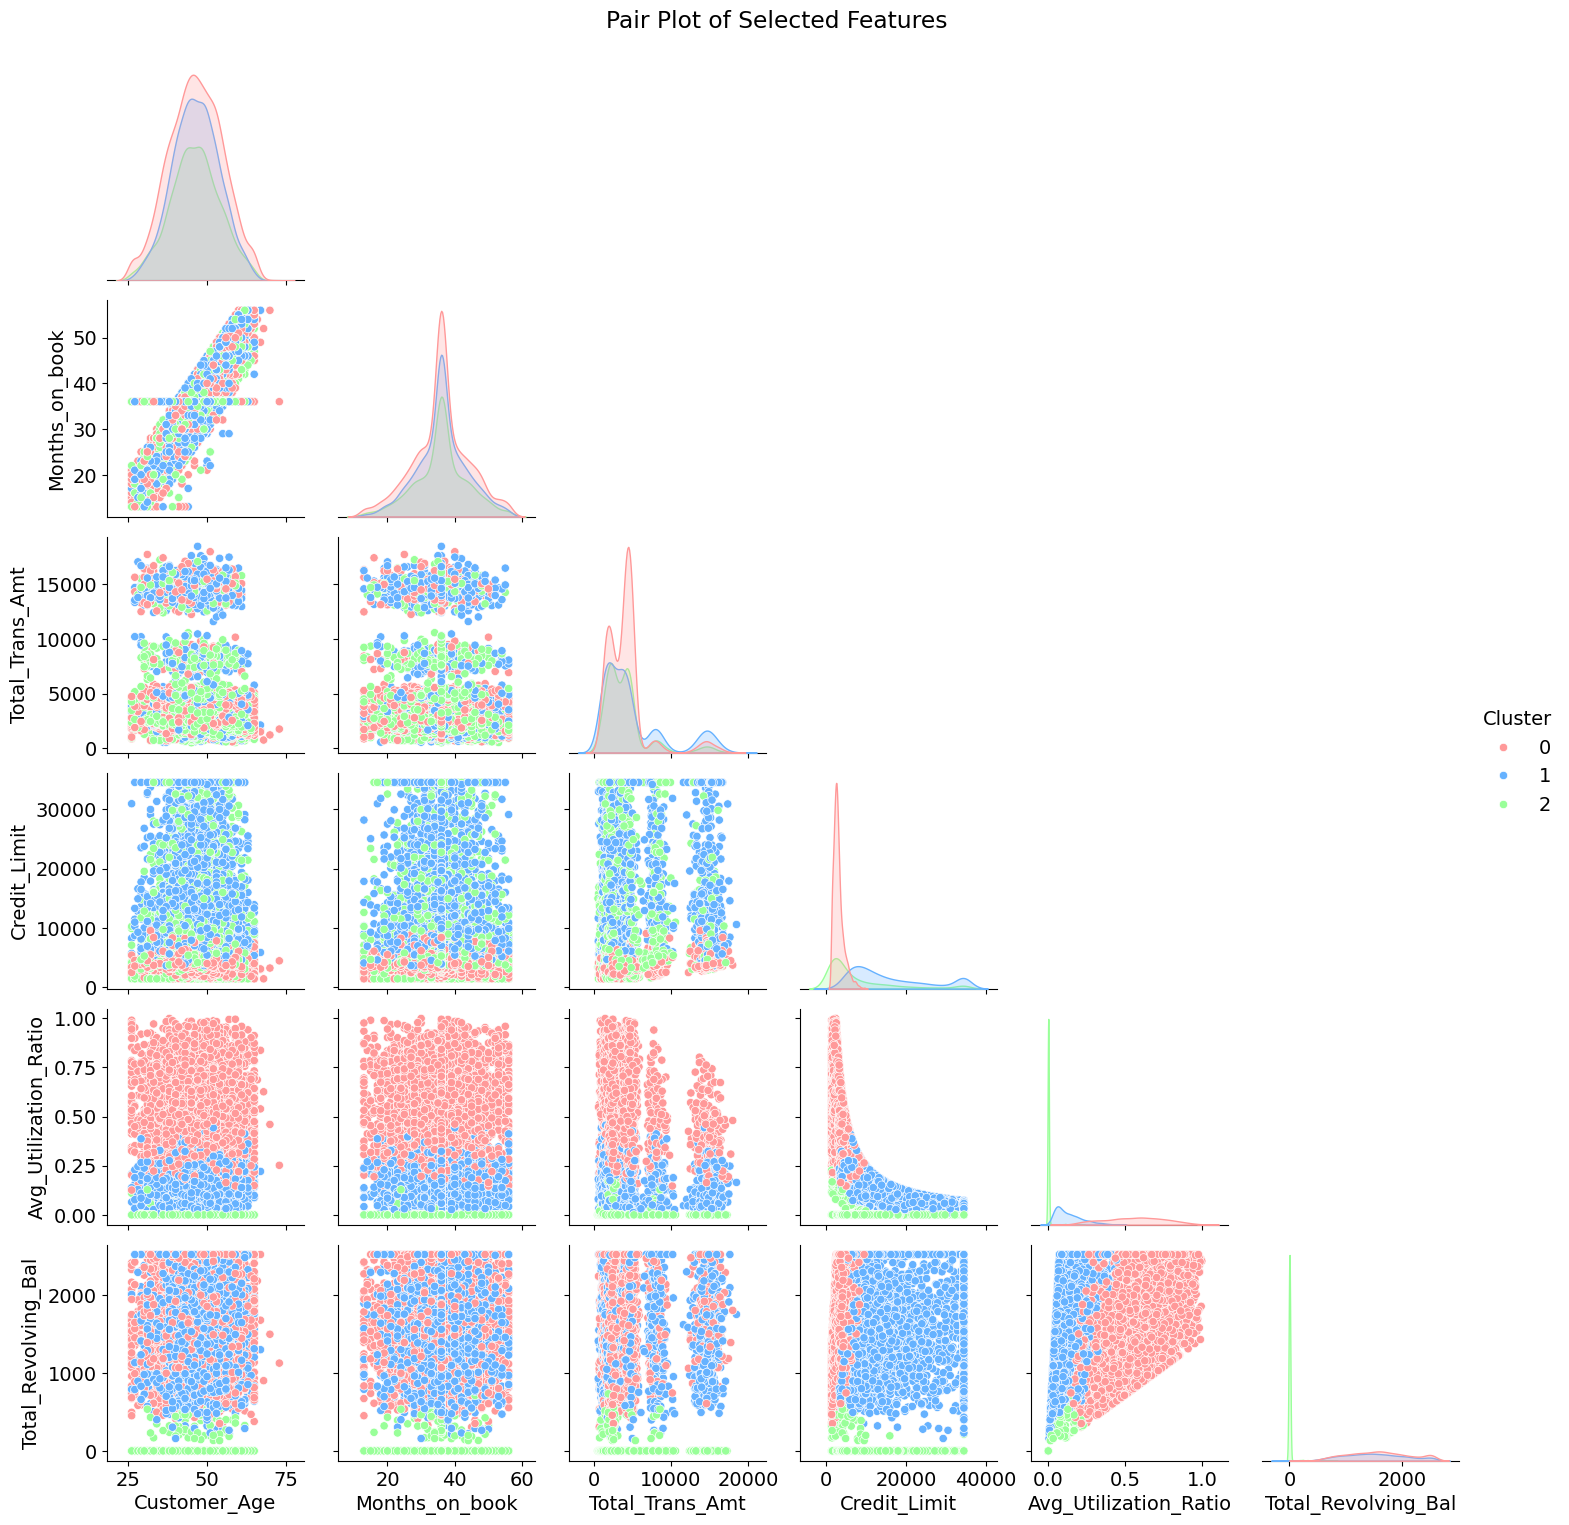

In [49]:
#Pair plot of the analyzed columns
# Make sure df_pca has PC1, PC2, and the cluster labels
df_clustered[[f"PCA{i}" for i in range(25)]] = df_pca[[f"PCA{i}" for i in range(25)]]

pairplot(df_clustered, columns_analysis, hue_column="Cluster", palette=color_palette_cat)

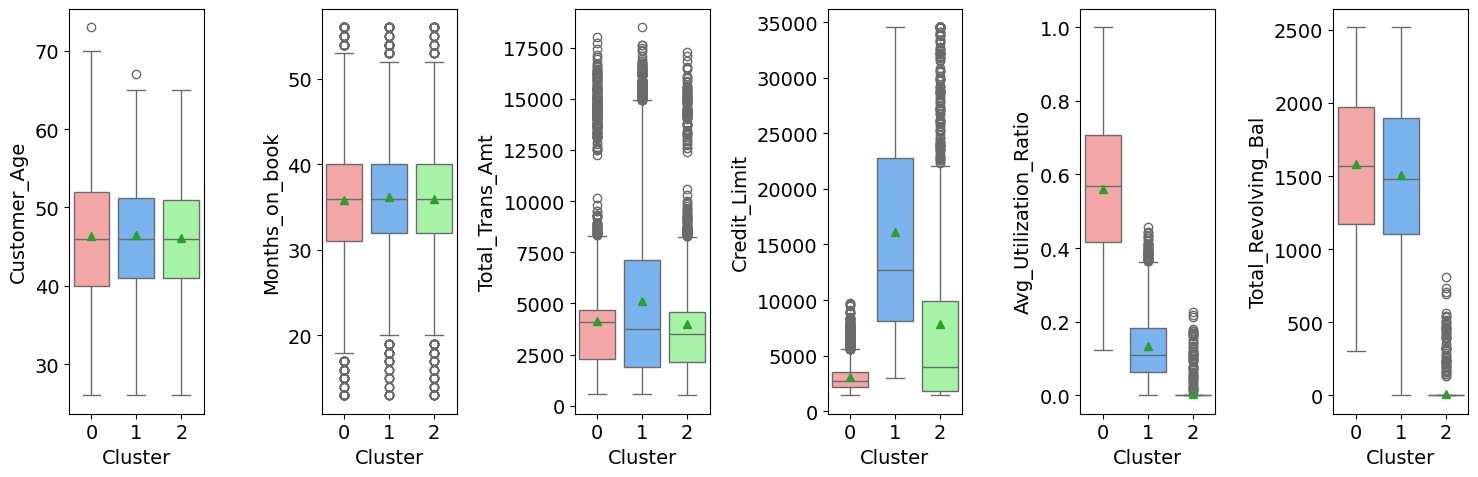

In [50]:
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(15, 5), tight_layout=True)

for ax, col in zip(axs, columns_analysis):
    sns.boxplot(x="Cluster", y=col, data=df_clustered, ax=ax, showmeans=True, palette=color_palette_cat)

Customer_Age & Months_on_book-

cluster 0 has younger customers and less no.of months on book
cluster 1 is between medians of cluster 0 and cluster 2
cluster 2 has older customer base and also months on book is more compared to others.

Total_Trans_Amt-

the 3 clusters are very similar

Credit_Limit & Avg_Utilization_Ratio-

all spend similarly....but cluster 1 has more credit limit and therefore has less utilization ratio

Total_Revolving_Bal-

Customers from clusters 0 and 2 have more debts on their credit cards compared to customers from cluster 1.

In [51]:
print(df_clustered['Income_Category'].unique())

['$60K - $80K' 'Less than $40K' '$40K - $60K' '$120K +' '$80K - $120K']


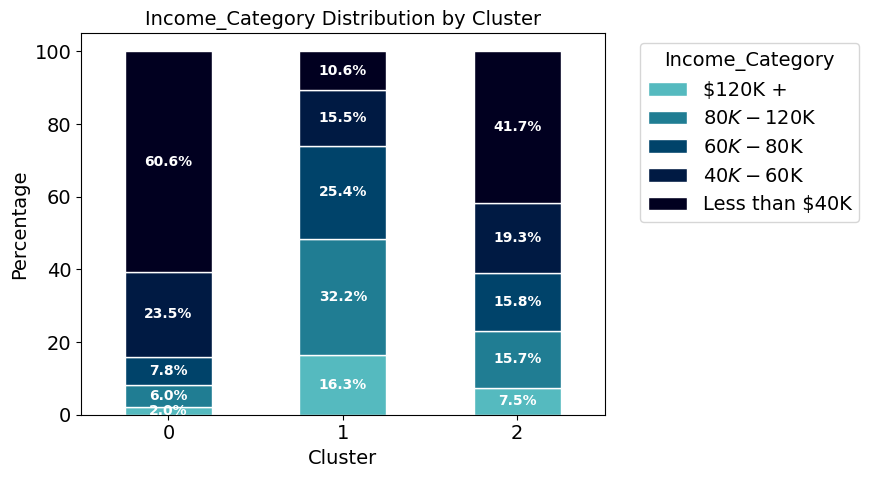

In [52]:
def plot_stacked_percentage_by_cluster(dataframe, col, cluster_col='Cluster', order=None, palette=None, figsize=(10, 6)):
    # Create crosstab of counts
    crosstab = pd.crosstab(dataframe[cluster_col], dataframe[col], normalize='index') * 100
    
    # Reorder columns if order is specified
    if order:
        crosstab = crosstab[order]

    # Plot
    ax = crosstab.plot(
        kind='bar',
        stacked=True,
        figsize=figsize,
        color=palette,
        edgecolor='white'
    )

    # Annotate percentages
    for i, cluster_row in enumerate(crosstab.values):
        cum_height = 0
        for j, percent in enumerate(cluster_row):
            if percent > 2:  # Only label if it's large enough to fit
                ax.text(
                    i,
                    cum_height + percent / 2,
                    f"{percent:.1f}%",
                    ha='center',
                    va='center',
                    color='white',
                    fontsize=10,
                    fontweight='bold'
                )
            cum_height += percent

    plt.title(f"{col} Distribution by Cluster", fontsize=14)
    plt.ylabel("Percentage")
    plt.xlabel("Cluster")
    plt.xticks(rotation=0)
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Call function
order = ["$120K +", "$80K - $120K", "$60K - $80K", "$40K - $60K", "Less than $40K"]
palette = ['#55babf', '#207d93', '#00436a', '#001a43', '#010020']

plot_stacked_percentage_by_cluster(
    dataframe=df_clustered,
    col="Income_Category",
    order=order,
    palette=palette,
    figsize=(9, 5)
)

Customers in Cluster 1 have the highest income.
In clusters 0 and 2, approximately half of the customers are allocated in the lowest income range, earning up to $40k annually
70% in less than 40 and 40-60 in clusters 0 and 1

In [53]:
# print(df_clustered['Education_Level'].unique())

KeyError: 'Education_Level'

In [230]:
# order = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate','Unknown']

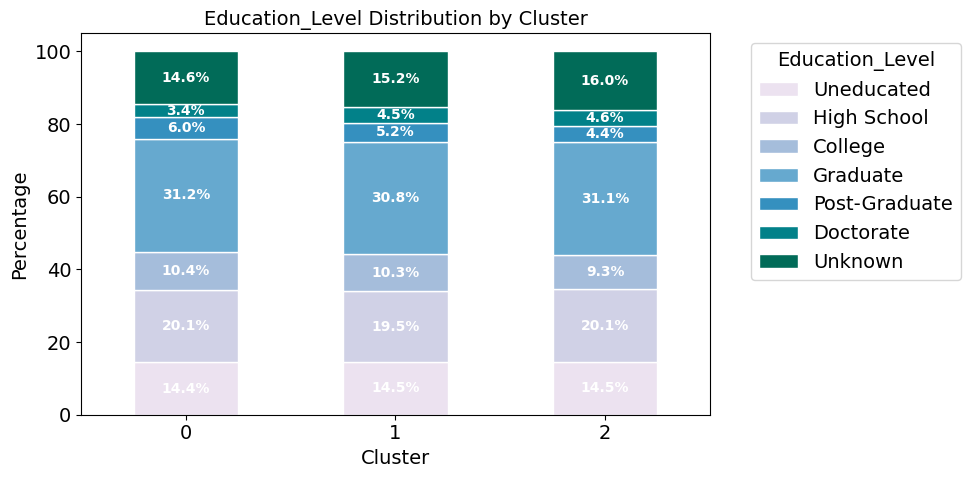

In [231]:
# palette = sns.color_palette("PuBuGn", len(order))  

# plot_stacked_percentage_by_cluster(
#     dataframe=df_clustered,
#     col="Education_Level",
#     order=order,
#     palette=palette,
#     figsize=(10, 5)
# )

In [232]:
#similar education distribution

In [233]:
print(df_clustered["Gender"].unique())

['M' 'F']


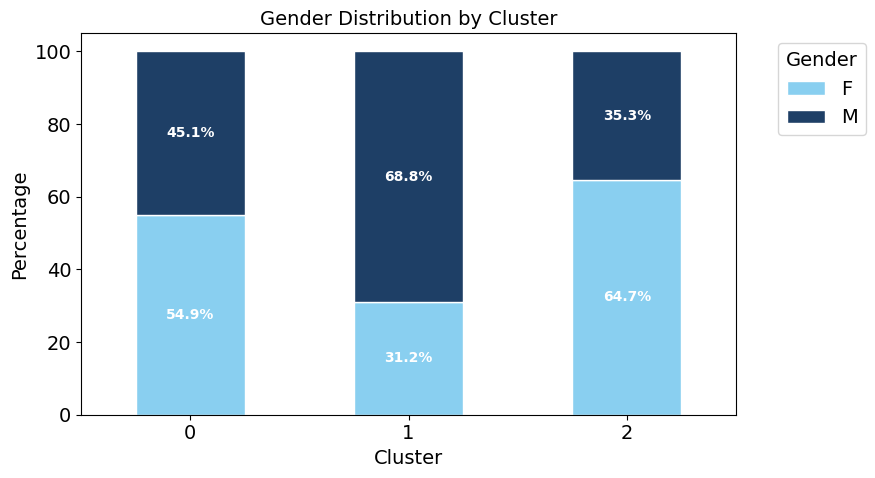

In [234]:
# Define order and palette for Gender
gender_order = ["F", "M"]
gender_palette = ["#89CFF0", "#1E3F66"]  # Light blue and dark blue

# Plot Gender distribution by cluster
plot_stacked_percentage_by_cluster(
    dataframe=df_clustered,
    col="Gender",
    order=gender_order,
    palette=gender_palette,
    figsize=(9, 5)
)


the gender distribution is uneven in clusters 1 and 2

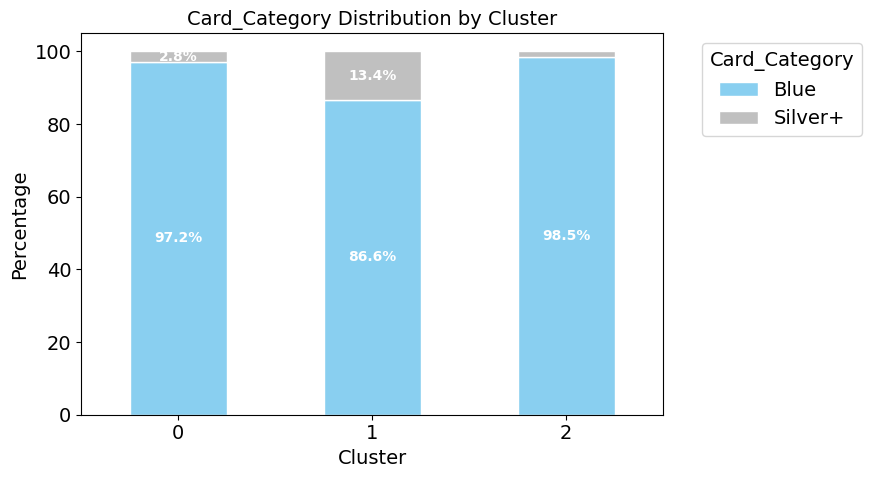

In [235]:
# Define order and palette for Card
card_order = ["Blue", "Silver+"]
card_palette = ["#89CFF0", "#C0C0C0"]  # Light blue and silver

# Plot Gender distribution by cluster
plot_stacked_percentage_by_cluster(
    dataframe=df_clustered,
    col="Card_Category",
    order=card_order,
    palette=card_palette,
    figsize=(9, 5)
)

cluster 1 has people with card category silver+

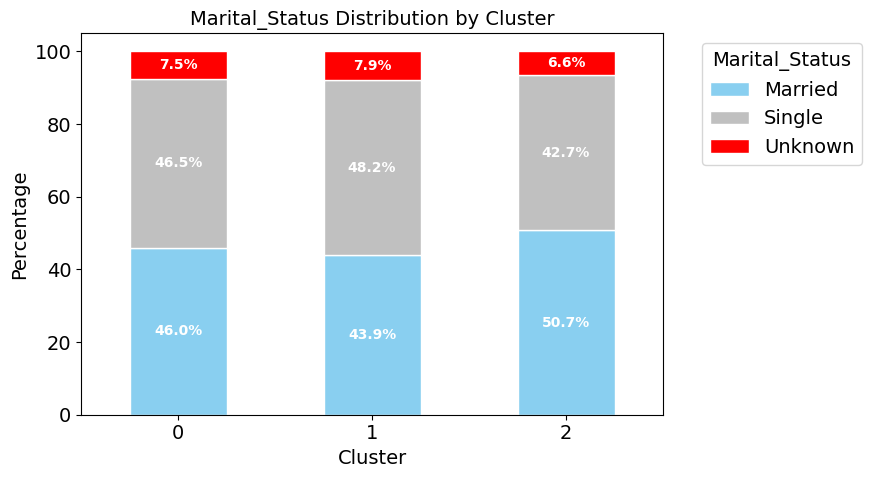

In [236]:
# Define order and palette for marital status
marital_order = ["Married", "Single", "Unknown"]
marital_palette = ["#89CFF0", "#C0C0C0", "#FF0000"]  # Light blue and silver

# Plot Gender distribution by cluster
plot_stacked_percentage_by_cluster(
    dataframe=df_clustered,
    col="Marital_Status",
    order=marital_order,
    palette=marital_palette,
    figsize=(9, 5)
)

similar marital status distribution across clsuters

Cluster 0
Customers of younger age

Relatively less relationship duration

approx equal gender dist.

lower credit limit

Higher credit card utilization ratio

Higher revolving balance on the credit card


Cluster 1

Customers of intermediate age

Relatively long relationship duration

Predominantly male

Higher credit limit

Lower credit card utilization ratio

Lower revolving balance on the credit card


Cluster 2

Older customers

Longer bank relationship

Predominantly female

Lower credit limit

Higher credit card utilization ratio

Higher revolving balance on the credit card